In [183]:
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt 
sns.set(style='ticks',font_scale=1.5)
sns.set_palette('colorblind')

In [210]:
def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient"""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.10, .9), xycoords=ax.transAxes,family='sans-serif',color='black',size='18')

In [213]:
def plot_scaterplot_graph(graph_data_file,title_for_graph):
    try:
        with open(graph_data_file) as csv_file:
            cols = list(pd.read_csv(graph_data_file, nrows =1))
            input_data=pd.read_csv(graph_data_file,usecols =[i for i in cols if i != 'Unnamed: 0'])
    except:
        raise Exception("Given file is not a csv file")
        
    try:
        if isinstance(title_for_graph,str):
            data_graph=sns.pairplot(data=input_data,corner=False)
            data_graph.map_upper(plt.scatter, color = "white", edgecolor = "white")
            data_graph.map_upper(corrfunc)
            data_graph.fig.suptitle(title_for_graph,y=1.05,size=25)
    except:
        raise Exception("Please pass string argument for the title")

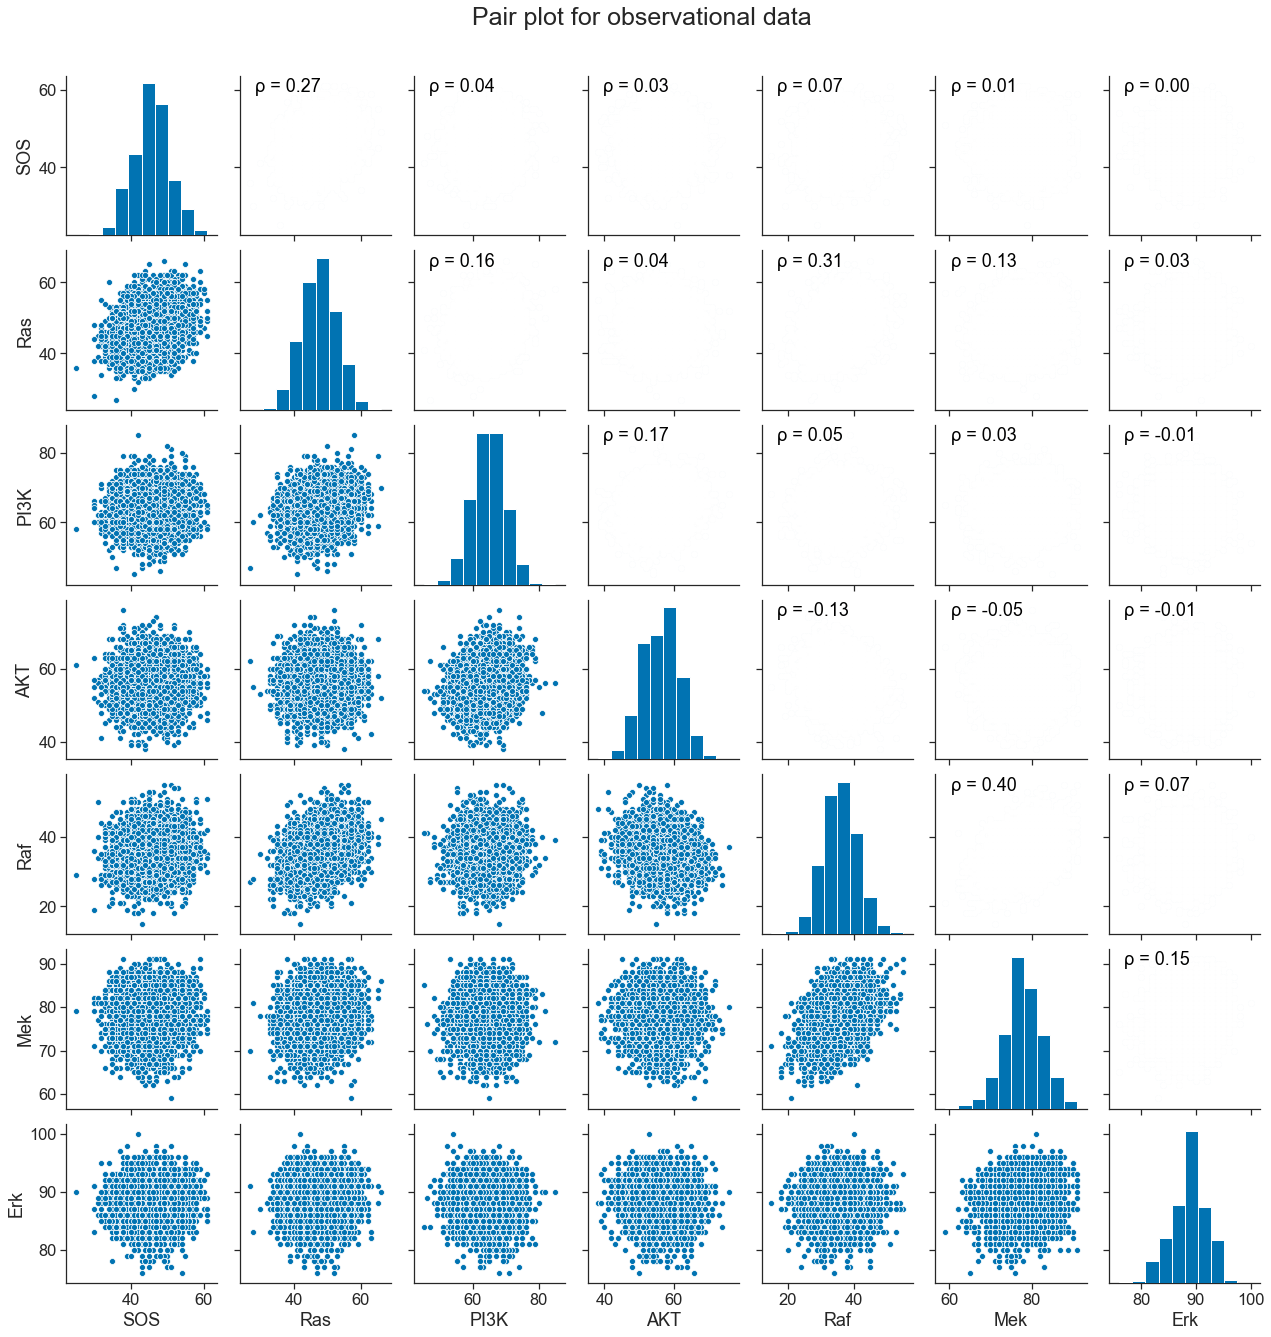

In [214]:
plot_scaterplot_graph('observational_igf.csv','Pair plot for observational data')